In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Sepal Lenth VS Sepal Width')

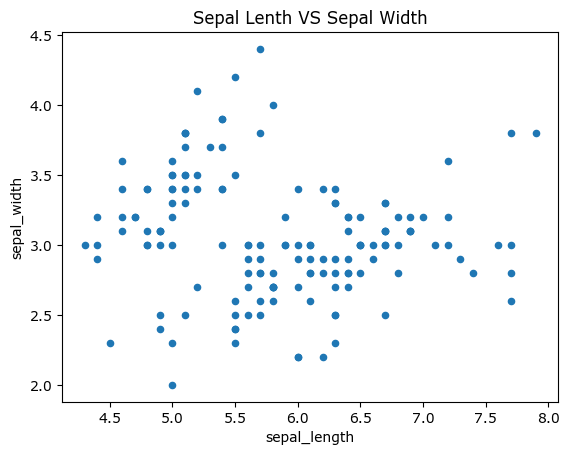

In [10]:
data.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.title('Sepal Lenth VS Sepal Width')


Text(0.5, 1.0, 'Sepal Lenth VS Sepal Width')

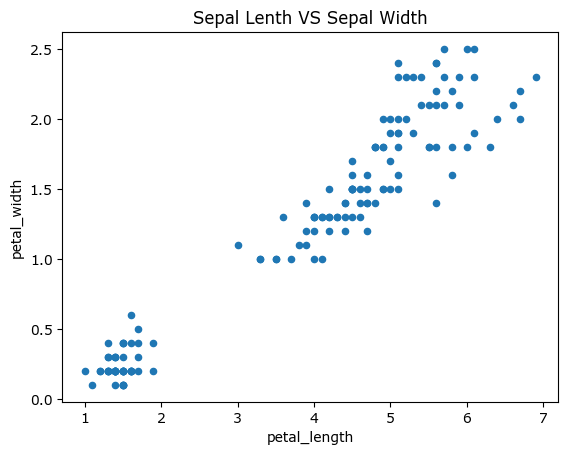

In [11]:
data.plot(kind='scatter', x='petal_length', y='petal_width')
plt.title('Sepal Lenth VS Sepal Width')

In [14]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
data['species'].value_counts()


species
0    50
1    50
2    50
Name: count, dtype: int64

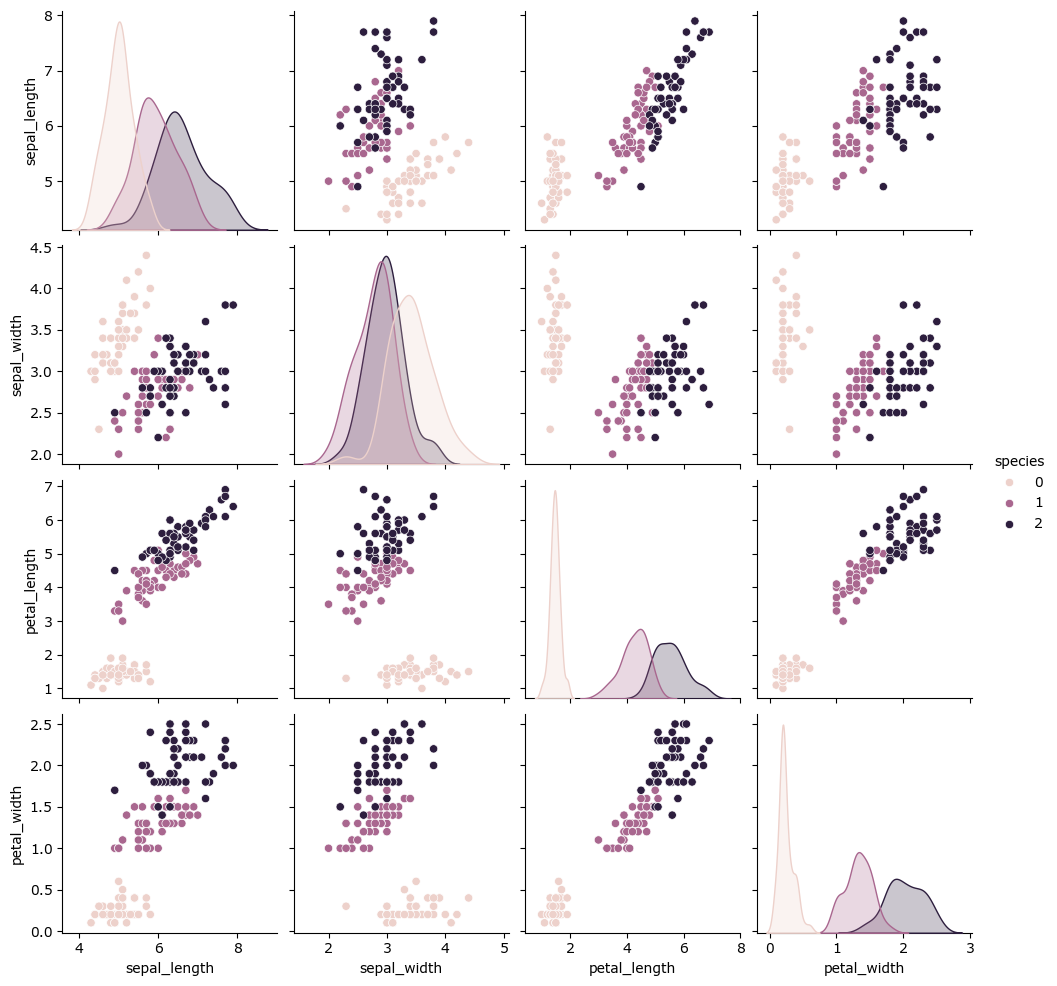

In [15]:
sns.pairplot(data, hue='species')

<Axes: xlabel='sepal_length', ylabel='Count'>

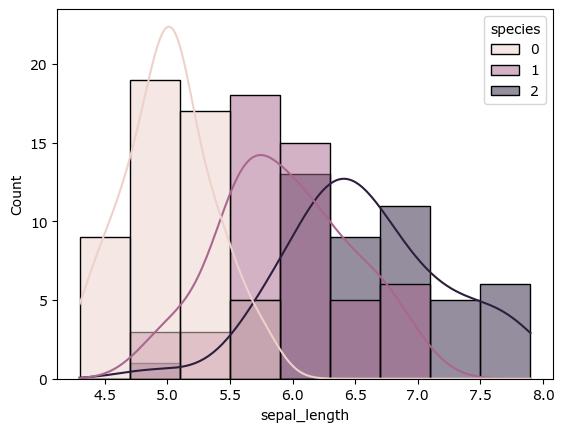

In [17]:
sns.histplot(data, x='sepal_length', hue='species', kde=True)

<Axes: xlabel='species', ylabel='petal_length'>

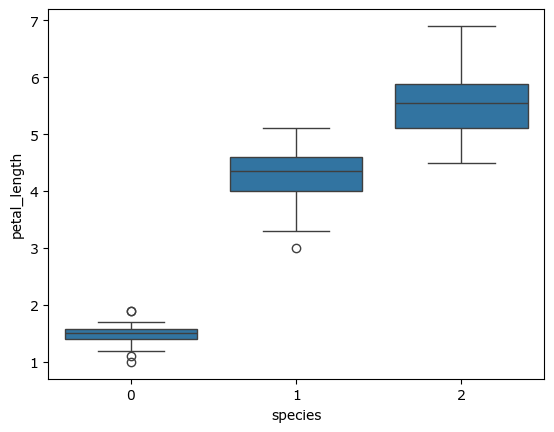

In [22]:
sns.boxplot(data, x='species', y='petal_length')


<Axes: >

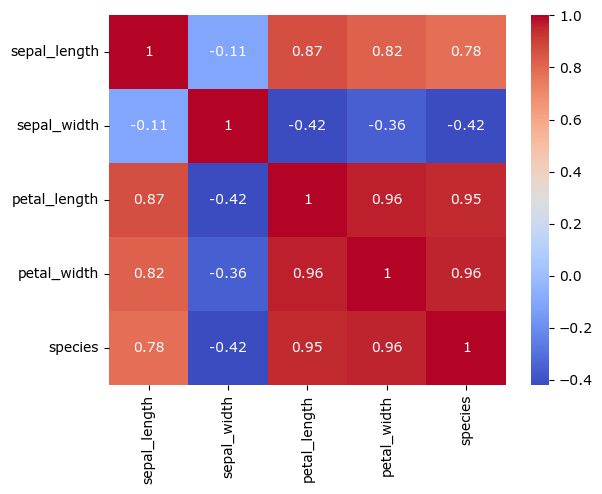

In [24]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

Text(0.5, 0, 'Petal Length')

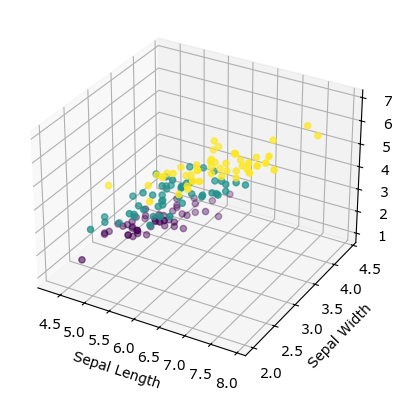

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['sepal_length'], data['sepal_width'], data['petal_length'], 
           c=data['species'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')


<Axes: xlabel='PC1', ylabel='PC2'>

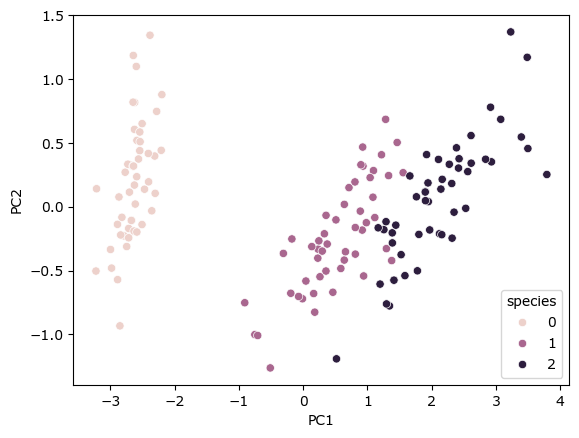

In [27]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
components = pca.fit_transform(data.drop('species', axis=1))
iris_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])
iris_pca['species'] = data['species']

sns.scatterplot(x='PC1', y='PC2', hue='species', data=iris_pca)


In [29]:
import plotly.express as px
px.scatter(data, x='petal_length', y='petal_width', color='species')